# Task: Develop a machine learning model to detect brain tumors from MRI images. Use CNNs to process and analyze the MRI scans provided in the dataset.

## Dataset Link: https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset

# Step 1: Importing necessary libraries

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Step 2: Data Preprocessing

### 1. Parameters and directory paths

In [2]:
img_height, img_width = 150, 150
batch_size = 32

In [3]:
train_dir = 'Training'
test_dir = 'Testing'

### 2. Data Augmentation and Rescaling for training

In [4]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # 20% of training data for validation
)

In [5]:
validation_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
test_datagen = ImageDataGenerator(rescale=1./255)

### 3. Create Generators

In [6]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'  
)

Found 4571 images belonging to 4 classes.


In [7]:
validation_generator = validation_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'  
)

Found 1141 images belonging to 4 classes.


In [8]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False 
)

Found 1311 images belonging to 4 classes.


 # Step 3: Build CNN Model

In [9]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')  # 4 classes for glioma, meningioma, notumour, pituitary
])

In [10]:
model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Step 4: Train the Model

In [21]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

In [15]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    callbacks=[early_stopping]
)

Epoch 1/20
142/142 [==============================] - 138s 975ms/step - loss: 0.5593 - accuracy: 0.7790 - val_loss: 1.3195 - val_accuracy: 0.6491
Epoch 2/20
142/142 [==============================] - 121s 850ms/step - loss: 0.5485 - accuracy: 0.7801 - val_loss: 0.8549 - val_accuracy: 0.7214
Epoch 3/20
142/142 [==============================] - 106s 747ms/step - loss: 0.5042 - accuracy: 0.7971 - val_loss: 1.0449 - val_accuracy: 0.7143
Epoch 4/20
142/142 [==============================] - 103s 722ms/step - loss: 0.5010 - accuracy: 0.7991 - val_loss: 1.9685 - val_accuracy: 0.5536
Epoch 5/20
142/142 [==============================] - 104s 728ms/step - loss: 0.4833 - accuracy: 0.8094 - val_loss: 0.9470 - val_accuracy: 0.7107
Epoch 6/20
142/142 [==============================] - 102s 718ms/step - loss: 0.4630 - accuracy: 0.8158 - val_loss: 1.5102 - val_accuracy: 0.6259
Epoch 7/20
142/142 [==============================] - 102s 720ms/step - loss: 0.4578 - accuracy: 0.8213 - val_loss: 1.1527 -

### To improve accuracy, the model is set to 20 additional epochs

In [28]:
history_continued = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=20,  
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    callbacks=[early_stopping]
)

Epoch 1/20
142/142 [==============================] - 99s 698ms/step - loss: 0.2841 - accuracy: 0.8920 - val_loss: 0.6725 - val_accuracy: 0.8268
Epoch 2/20
142/142 [==============================] - 113s 792ms/step - loss: 0.2692 - accuracy: 0.8991 - val_loss: 0.6844 - val_accuracy: 0.8232
Epoch 3/20
142/142 [==============================] - 105s 738ms/step - loss: 0.2625 - accuracy: 0.9015 - val_loss: 0.5997 - val_accuracy: 0.8509
Epoch 4/20
142/142 [==============================] - 102s 717ms/step - loss: 0.2593 - accuracy: 0.9028 - val_loss: 0.6280 - val_accuracy: 0.8339
Epoch 5/20
142/142 [==============================] - 102s 715ms/step - loss: 0.2489 - accuracy: 0.9037 - val_loss: 1.0419 - val_accuracy: 0.7634
Epoch 6/20
142/142 [==============================] - 104s 728ms/step - loss: 0.2498 - accuracy: 0.9108 - val_loss: 1.1338 - val_accuracy: 0.7411
Epoch 7/20
142/142 [==============================] - 102s 717ms/step - loss: 0.2679 - accuracy: 0.9004 - val_loss: 0.5826 - 

# Step 5: Training History

### Combine the history of the previous and continued training

In [30]:
history.history['accuracy'] += history_continued.history['accuracy']
history.history['val_accuracy'] += history_continued.history['val_accuracy']
history.history['loss'] += history_continued.history['loss']
history.history['val_loss'] += history_continued.history['val_loss']

### 1. training & validation accuracy 

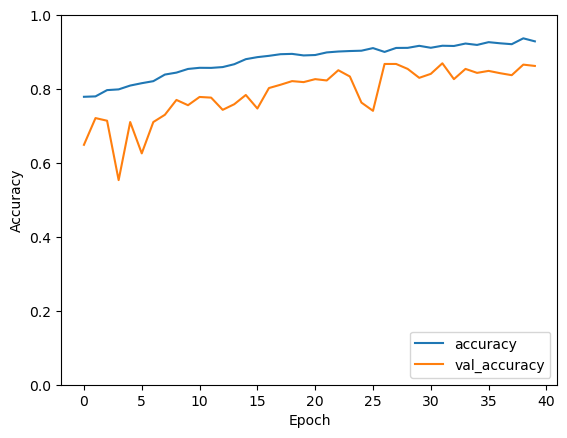

In [31]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

### 2. training & validation loss 

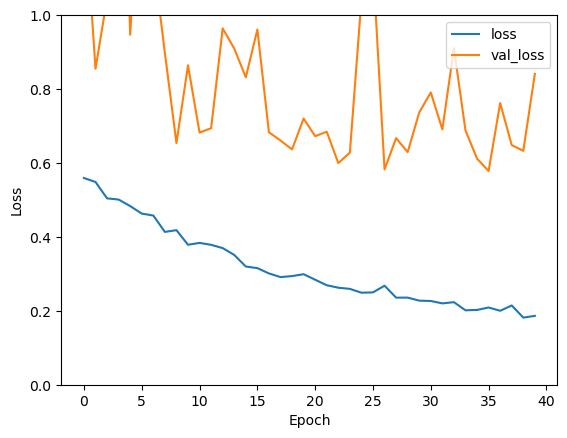

In [32]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 1])
plt.legend(loc='upper right')
plt.show()

# Step 6: Model Evaluation

In [33]:
model.save('brain_tumor_classifier.h5')

C:\Users\PC\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [29]:
val_loss, val_acc = model.evaluate(validation_generator, steps=validation_generator.samples // batch_size)
print(f"Validation accuracy: {val_acc * 100:.2f}%")

35/35 [==============================] - 7s 183ms/step - loss: 0.8442 - accuracy: 0.8616
Validation accuracy: 86.16%


# Step 7: Predictions on Test Data

In [34]:
predictions = model.predict(test_generator)

41/41 [==============================] - 24s 581ms/step


In [35]:
predicted_labels = np.argmax(predictions, axis=1)
class_labels = list(test_generator.class_indices.keys())

In [36]:
df_predictions = pd.DataFrame({
    'Filename': test_generator.filenames,
    'Prediction': [class_labels[i] for i in predicted_labels]
})

In [37]:
df_predictions

,Filename,Prediction
0,glioma\Te-glTr_0000.jpg,notumor
1,glioma\Te-glTr_0001.jpg,glioma
2,glioma\Te-glTr_0002.jpg,glioma
3,glioma\Te-glTr_0003.jpg,glioma
4,glioma\Te-glTr_0004.jpg,glioma
...,...,...
1306,pituitary\Te-pi_0295.jpg,pituitary
1307,pituitary\Te-pi_0296.jpg,pituitary
1308,pituitary\Te-pi_0297.jpg,pituitary
1309,pituitary\Te-pi_0298.jpg,pituitary


In [48]:
matches = df_predictions.apply(lambda row: row['Filename'].split('\\')[0] == row['Prediction'], axis=1)

In [49]:
num_matches = matches.sum()
total_predictions = len(df_predictions)
accuracy = num_matches / total_predictions

In [50]:
print(f"Number of matches: {num_matches}")
print(f"Total predictions: {total_predictions}")
print(f"Accuracy: {accuracy * 100:.2f}%")

Number of matches: 1124
Total predictions: 1311
Accuracy: 85.74%


In [38]:
df_predictions.to_csv('test_predictions_2.csv', index=False)

# Sample Demo

In [55]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from tensorflow import keras

In [58]:
def predict_tumor(model, img_path, target_size=(150, 150)):
    # Load the image
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # resize dimensions
    img_array /= 255.0  # normalize to [0, 1]

    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction, axis=1)

    class_labels = ['glioma', 'meningioma', 'notumour', 'pituitary']
    predicted_label = class_labels[predicted_class[0]]

    plt.imshow(img)
    plt.title(f'Predicted: {predicted_label}')
    plt.axis('off')
    plt.show()

    return predicted_label

In [115]:
image_path = 'img4.jpg'

In [79]:
model = keras.models.load_model('brain_tumor_classifier.h5')

1/1 [==============================] - 0s 53ms/step


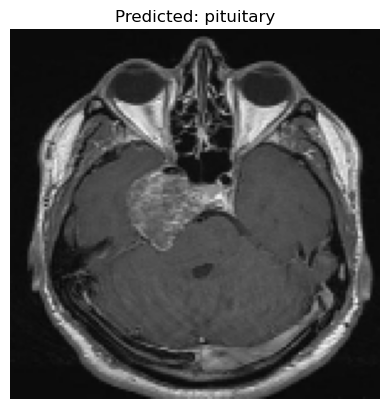

The predicted tumor type is: pituitary


In [116]:
predicted_label = predict_tumor(model, image_path)
print(f'The predicted tumor type is: {predicted_label}')

In [117]:
image_path = 'img3.jpg'

1/1 [==============================] - 0s 69ms/step


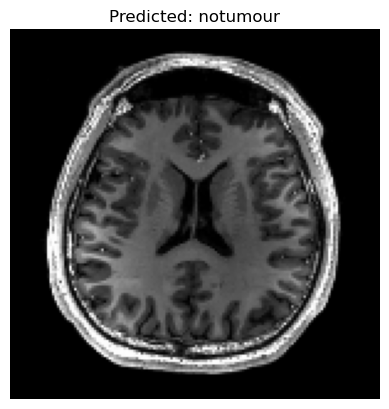

The predicted tumor type is: notumour


In [118]:
predicted_label = predict_tumor(model, image_path)
print(f'The predicted tumor type is: {predicted_label}')